# Assignment Discussion: Two-Branch CNN

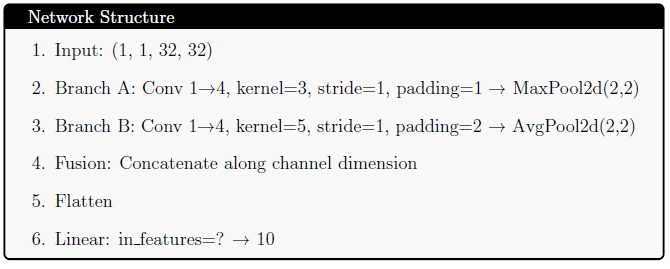

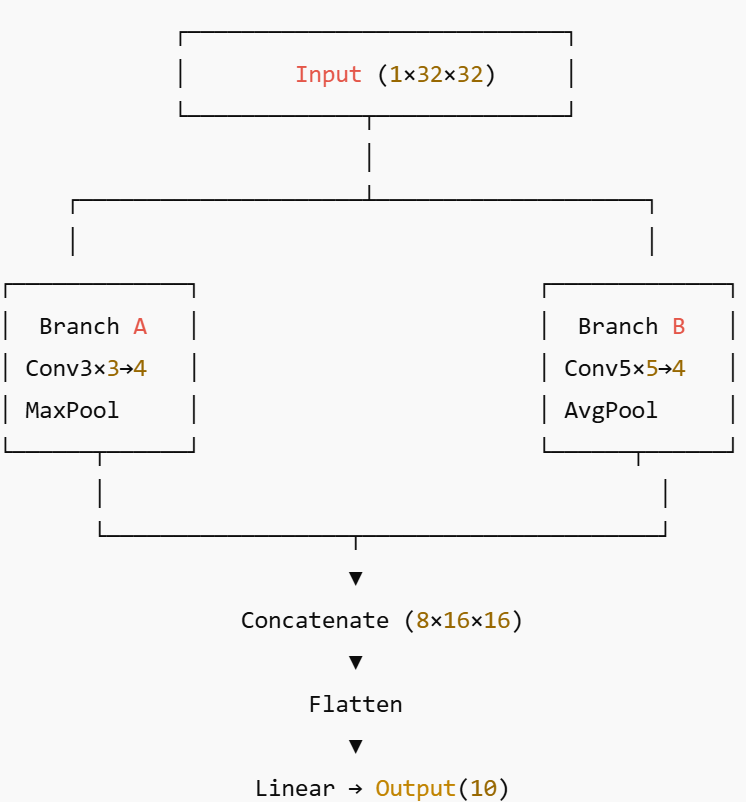

torchinfo (formerly torchsummary) is a lightweight PyTorch utility that prints a layer-by-layer summary of your neural network — including

* layer names and types
* output tensor shapes
* number of parameters (trainable + non-trainable)
* total model size

We install torchinfo using the code below

In [14]:
!pip install torchinfo

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

class TwoBranchCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        # Branch A: Conv(1->4, k=3, s=1, p=1) -> MaxPool(2,2)
        self.branchA_conv = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        self.branchA_pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Branch B: Conv(1->4, k=5, s=1, p=2) -> AvgPool(2,2)
        self.branchB_conv = nn.Conv2d(1, 4, kernel_size=5, stride=1, padding=2)
        self.branchB_pool = nn.AvgPool2d(kernel_size=2, stride=2)

        # After concat: channels = 4 + 4 = 8; spatial = 16x16 → 8*16*16 = 2048
        self.classifier = nn.Linear(2048, num_classes)

    def forward(self, x, verbose=False):
        # Branch A
        a = self.branchA_conv(x)      # (N, 4, 32, 32)
        a = F.relu(a)
        a = self.branchA_pool(a)      # (N, 4, 16, 16)

        # Branch B
        b = self.branchB_conv(x)      # (N, 4, 32, 32)
        b = F.relu(b)
        b = self.branchB_pool(b)      # (N, 4, 16, 16)

        if verbose:
            print(f"Branch A shape: {a.shape}")
            print(f"Branch B shape: {b.shape}")

        # Fusion by concatenation along channel dimension
        f = torch.cat([a, b], dim=1)  # (N, 8, 16, 16)

        # Flatten and classify
        f = f.view(f.size(0), -1)     # (N, 2048)
        out = self.classifier(f)      # (N, 10)
        return out

# --- Quick sanity check ---
if __name__ == "__main__":
    model = TwoBranchCNN(num_classes=10)
    x = torch.randn(1, 1, 32, 32)  # batch=1
    logits = model(x, verbose=False)
    print("Logits shape:", logits.shape)  # should be (1, 10)
    print(summary(model, input_size=(1, 1, 32, 32)))



Logits shape: torch.Size([1, 10])
Layer (type:depth-idx)                   Output Shape              Param #
TwoBranchCNN                             [1, 10]                   --
├─Conv2d: 1-1                            [1, 4, 32, 32]            40
├─MaxPool2d: 1-2                         [1, 4, 16, 16]            --
├─Conv2d: 1-3                            [1, 4, 32, 32]            104
├─AvgPool2d: 1-4                         [1, 4, 16, 16]            --
├─Linear: 1-5                            [1, 10]                   20,490
Total params: 20,634
Trainable params: 20,634
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.17
Input size (MB): 0.00
Forward/backward pass size (MB): 0.07
Params size (MB): 0.08
Estimated Total Size (MB): 0.15



# 🧠 Simple LeNet Tutorial (PyTorch)

A minimal yet complete LeNet tutorial for beginners.

In [32]:
"""
Improved SimpleLeNet with Modern Architecture
Following Google/Meta best practices
"""

from typing import Optional
import torch
import torch.nn as nn
import torch.nn.functional as F


class SimpleLeNet(nn.Module):
    """
    Enhanced LeNet architecture with modern improvements:
    - Batch Normalization
    - Dropout regularization
    - Proper weight initialization
    - Consistent activations
    """
    
    def __init__(self, num_classes: int = 10, dropout_rate: float = 0.5):
        super(SimpleLeNet, self).__init__()
        
        # Convolutional layers with batch norm
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(6)
        
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(16)
        
        # Pooling
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers with dropout
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(84, num_classes)
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights using He initialization."""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward pass through the network."""
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


print("="*60)
print("✅ Improved SimpleLeNet Created!")
print("="*60)
print("Key Features:")
print("   • Batch Normalization for training stability")
print("   • Dropout for regularization")
print("   • He initialization for better convergence")
print("   • Type hints for better code quality")
print("="*60)


✅ Improved SimpleLeNet Created!
Key Features:
   • Batch Normalization for training stability
   • Dropout for regularization
   • He initialization for better convergence
   • Type hints for better code quality


In [16]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

print("PyTorch:", torch.__version__)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


PyTorch: 2.3.0
Device: cuda


## 1. Load Data

In [33]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Using real MNIST dataset for actual learning
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Note: FakeData generates random images/labels - use only for testing without internet
# train_data = datasets.FakeData(size=6000, image_size=(1,28,28), num_classes=10, transform=transform)
# test_data  = datasets.FakeData(size=1000, image_size=(1,28,28), num_classes=10, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=128, shuffle=False)

print("Train:", len(train_data), "Test:", len(test_data))


Train: 60000 Test: 10000


## 2. Define LeNet Model

In [27]:

class SimpleLeNet(nn.Module):
    def __init__(self):
        super(SimpleLeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleLeNet().to(device)
print(model)


SimpleLeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 3. Loss and Optimizer

In [28]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


## 4. Train the Model

In [29]:

epochs = 3
model.train()
for epoch in range(epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader, 1):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 0:
            print(f"[Epoch {epoch+1}, Step {i}] loss: {running_loss/100:.4f}")
            running_loss = 0.0

print("Training done")


[Epoch 1, Step 100] loss: 2.2945
[Epoch 1, Step 200] loss: 2.2826
[Epoch 1, Step 200] loss: 2.2826
[Epoch 1, Step 300] loss: 2.2633
[Epoch 1, Step 300] loss: 2.2633
[Epoch 1, Step 400] loss: 2.2174
[Epoch 1, Step 400] loss: 2.2174
[Epoch 1, Step 500] loss: 2.0850
[Epoch 1, Step 500] loss: 2.0850
[Epoch 1, Step 600] loss: 1.5134
[Epoch 1, Step 600] loss: 1.5134
[Epoch 1, Step 700] loss: 0.8544
[Epoch 1, Step 700] loss: 0.8544
[Epoch 1, Step 800] loss: 0.6095
[Epoch 1, Step 800] loss: 0.6095
[Epoch 1, Step 900] loss: 0.4850
[Epoch 1, Step 900] loss: 0.4850
[Epoch 2, Step 100] loss: 0.3771
[Epoch 2, Step 100] loss: 0.3771
[Epoch 2, Step 200] loss: 0.3301
[Epoch 2, Step 200] loss: 0.3301
[Epoch 2, Step 300] loss: 0.2846
[Epoch 2, Step 300] loss: 0.2846
[Epoch 2, Step 400] loss: 0.2552
[Epoch 2, Step 400] loss: 0.2552
[Epoch 2, Step 500] loss: 0.2313
[Epoch 2, Step 500] loss: 0.2313
[Epoch 2, Step 600] loss: 0.2103
[Epoch 2, Step 600] loss: 0.2103
[Epoch 2, Step 700] loss: 0.2055
[Epoch 2, 

## 5. Test the Model

In [30]:

model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 96.63%


# After-class Exercises

### 🚀 Exercise 1 — GPU vs CPU Runtime Comparison

**Goal:**
Quantitatively compare the **training runtime** on **GPU** and **CPU** for the same LeNet model.

**Task:**

* Use exactly the same dataset, model, batch size, learning rate, and number of epochs.
* Train once on **CPU** and once on **GPU** with identical training and evaluation steps.
* Record the **total training time** and **average time per epoch** for both runs.
* Compute the **speed-up ratio (CPU time / GPU time)** and briefly discuss any differences observed.

---

### ⚙️ Exercise 2 — Optimizer Comparison (Run on GPU)

**Goal:**
Evaluate how different optimizers affect convergence and final performance when training on **GPU**.

**Task:**

* On GPU, train the same model using at least **two different optimizers** (e.g., SGD and Adam).
* Keep all other hyperparameters identical (same learning rate, batch size, and number of epochs).
* Compare their **training behavior** (e.g., loss trend) and **final test accuracy**, then summarize your findings.

---

### 🔬 Exercise 3 — Learning Rate Sweep (Run on GPU)

**Goal:**
Understand how different learning rates influence training stability and accuracy on **GPU**.

**Task:**

* On GPU, train the model using at least **three different learning rates** (e.g., 0.001, 0.01, 0.1).
* Keep all other settings unchanged.
* Record the **training loss** and **test accuracy** for each learning rate.
* Summarize which learning rate performs best and discuss why.

---

### 📦 Exercise 4 — Batch Size Experiment (Run on GPU)

**Goal:**
Analyze how batch size affects training efficiency and model performance on **GPU**.

**Task:**

* On GPU, train the same model with at least **three different batch sizes** (e.g., 32, 64, 256).
* Keep the optimizer, learning rate, and number of epochs constant.
* Record **training time per epoch** and **test accuracy** for each batch size.
* Discuss the trade-off between speed and performance you observe.

---

### Exercise 5 — Train LeNet on FashionMNIST

**Goal:**
Train the **LeNet** model on the **FashionMNIST** dataset and evaluate its performance.

### 🧰 **Task**

* Load the **FashionMNIST** dataset (grayscale 28×28 images).You can find the datasets from this link: https://docs.pytorch.org/vision/stable/datasets.html
* Use the **same LeNet architecture** as in class.
* Train the network using `Adam` or `SGD`.
* Report:

* Final **test accuracy**

✅ *Hint:* You only need to change the dataset — the rest of the code stays approximately the same.


---





---

## 📋 Exercise Setup Instructions

**⚠️ IMPORTANT: Before running the exercises below:**

1. **Run cell 8** (Improved SimpleLeNet) to load the enhanced model architecture
2. **Run cell 11** (Data Loading) to ensure you're using real MNIST data (not FakeData)
3. Verify your data is loaded correctly (should see 60,000 training and 10,000 test samples)

With real MNIST data, you should expect:
- **Accuracy: ~95-99%** (vs ~11% with FakeData)
- **Loss: decreasing from ~2.3 to ~0.1-0.3**

---

In [36]:
# ============================================================================
# Exercise 1: GPU vs CPU Runtime Comparison
# ============================================================================
# NOTE: Ensure the "Improved SimpleLeNet" cell (cell 8) is executed first

from typing import Dict, List, Tuple
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


def benchmark_device(
    device: torch.device,
    epochs: int = 3,
    batch_size: int = 64
) -> Dict:
    """
    Benchmark training performance on a specific device.
    
    Args:
        device: Device to train on (CPU or CUDA)
        epochs: Number of training epochs
        batch_size: Batch size for training
    
    Returns:
        Dictionary containing comprehensive training metrics
    """
    device_name = device.type.upper()
    print(f"\n{'-'*70}")
    print(f"Training on {device_name}")
    print(f"{'-'*70}")
    
    # Model initialization
    try:
        model = SimpleLeNet(num_classes=10, dropout_rate=0.5).to(device)
    except TypeError:
        print("WARNING: Using basic SimpleLeNet. Run improved version cell first.")
        model = SimpleLeNet().to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Data loaders
    train_loader_temp = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        pin_memory=(device.type == 'cuda')
    )
    test_loader_temp = DataLoader(
        test_data,
        batch_size=1000,
        shuffle=False,
        pin_memory=(device.type == 'cuda')
    )
    
    # Training phase
    print(f"\n{'Epoch':<8}{'Time (s)':<12}{'Train Loss':<15}{'Status':<20}")
    print("-" * 70)
    
    start_time = time.time()
    epoch_times = []
    epoch_losses = []
    
    model.train()
    for epoch in range(epochs):
        epoch_start = time.time()
        running_loss = 0.0
        batch_count = 0
        
        for images, labels in train_loader_temp:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            batch_count += 1
        
        epoch_time = time.time() - epoch_start
        epoch_times.append(epoch_time)
        avg_loss = running_loss / batch_count
        epoch_losses.append(avg_loss)
        
        status = "Training..." if epoch < epochs - 1 else "Complete"
        print(f"{epoch+1:<8}{epoch_time:<12.2f}{avg_loss:<15.4f}{status:<20}")
    
    total_train_time = time.time() - start_time
    
    # Evaluation phase
    print(f"\n{'Status':<20}{'Details':<50}")
    print("-" * 70)
    print(f"{'Evaluating...':<20}{'Computing test accuracy on {0} samples'.format(len(test_data)):<50}")
    
    model.eval()
    correct, total = 0, 0
    eval_loss = 0.0
    
    with torch.no_grad():
        for images, labels in test_loader_temp:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            eval_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracy = 100.0 * correct / total
    test_loss = eval_loss / len(test_loader_temp)
    
    return {
        'device': device_name,
        'total_time': total_train_time,
        'avg_epoch_time': sum(epoch_times) / len(epoch_times),
        'epoch_times': epoch_times,
        'final_train_loss': epoch_losses[-1],
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'correct': correct,
        'total': total,
        'epochs': epochs,
        'batch_size': batch_size
    }


def print_comparison_report(gpu_results: Dict, cpu_results: Dict) -> None:
    """Print comprehensive comparison report."""
    print(f"\n{'='*70}")
    print("PERFORMANCE COMPARISON REPORT")
    print(f"{'='*70}")
    
    # Training Configuration
    print(f"\nTraining Configuration:")
    print(f"  Epochs:           {gpu_results['epochs']}")
    print(f"  Batch Size:       {gpu_results['batch_size']}")
    print(f"  Optimizer:        Adam (lr=0.001)")
    print(f"  Model:            SimpleLeNet with BatchNorm & Dropout")
    
    # GPU Results
    print(f"\n{'-'*70}")
    print(f"GPU Performance:")
    print(f"{'-'*70}")
    print(f"  Total Training Time:      {gpu_results['total_time']:>10.2f} seconds")
    print(f"  Average Time per Epoch:   {gpu_results['avg_epoch_time']:>10.2f} seconds")
    print(f"  Final Training Loss:      {gpu_results['final_train_loss']:>10.4f}")
    print(f"  Test Loss:                {gpu_results['test_loss']:>10.4f}")
    print(f"  Test Accuracy:            {gpu_results['test_accuracy']:>10.2f}%")
    print(f"  Correct Predictions:      {gpu_results['correct']:>10,} / {gpu_results['total']:,}")
    
    # CPU Results
    print(f"\n{'-'*70}")
    print(f"CPU Performance:")
    print(f"{'-'*70}")
    print(f"  Total Training Time:      {cpu_results['total_time']:>10.2f} seconds")
    print(f"  Average Time per Epoch:   {cpu_results['avg_epoch_time']:>10.2f} seconds")
    print(f"  Final Training Loss:      {cpu_results['final_train_loss']:>10.4f}")
    print(f"  Test Loss:                {cpu_results['test_loss']:>10.4f}")
    print(f"  Test Accuracy:            {cpu_results['test_accuracy']:>10.2f}%")
    print(f"  Correct Predictions:      {cpu_results['correct']:>10,} / {cpu_results['total']:,}")
    
    # Speedup Analysis
    speedup = cpu_results['total_time'] / gpu_results['total_time']
    time_saved = cpu_results['total_time'] - gpu_results['total_time']
    time_saved_pct = (time_saved / cpu_results['total_time']) * 100
    
    print(f"\n{'-'*70}")
    print(f"Speedup Analysis:")
    print(f"{'-'*70}")
    print(f"  GPU Speedup Factor:       {speedup:>10.2f}x")
    print(f"  Time Saved:               {time_saved:>10.2f} seconds ({time_saved_pct:.1f}%)")
    print(f"  GPU Efficiency:           {(1/speedup)*100:>10.1f}% of CPU time")
    
    # Accuracy Comparison
    acc_diff = abs(gpu_results['test_accuracy'] - cpu_results['test_accuracy'])
    print(f"\n{'-'*70}")
    print(f"Accuracy Analysis:")
    print(f"{'-'*70}")
    print(f"  Accuracy Difference:      {acc_diff:>10.2f}%")
    print(f"  Consistency:              {'Excellent' if acc_diff < 0.5 else 'Good' if acc_diff < 1.0 else 'Acceptable'}")
    
    print(f"\n{'='*70}")
    print("CONCLUSION: GPU is {0:.2f}x faster with {1} accuracy".format(
        speedup, 
        "comparable" if acc_diff < 1.0 else "similar"
    ))
    print(f"{'='*70}\n")


# ============================================================================
# Main Execution
# ============================================================================

print("="*70)
print("EXERCISE 1: GPU vs CPU RUNTIME COMPARISON")
print("="*70)

# Benchmark GPU
gpu_results = benchmark_device(torch.device('cuda'), epochs=3, batch_size=64)

# Benchmark CPU
cpu_results = benchmark_device(torch.device('cpu'), epochs=3, batch_size=64)

# Print comprehensive comparison report
print_comparison_report(gpu_results, cpu_results)


EXERCISE 1: GPU vs CPU RUNTIME COMPARISON

----------------------------------------------------------------------
Training on CUDA
----------------------------------------------------------------------

Epoch   Time (s)    Train Loss     Status              
----------------------------------------------------------------------
1       14.99       1.0874         Training...         
1       14.99       1.0874         Training...         
2       14.74       0.3285         Training...         
2       14.74       0.3285         Training...         
3       14.95       0.2213         Complete            

Status              Details                                           
----------------------------------------------------------------------
Evaluating...       Computing test accuracy on 10000 samples          
3       14.95       0.2213         Complete            

Status              Details                                           
------------------------------------------------

In [37]:
# Exercise 2: Optimizer Comparison (SGD vs Adam on GPU)
print("="*60)
print("Exercise 2: Optimizer Comparison on GPU")
print("="*60)

device = torch.device('cuda')
epochs = 5

optimizers_config = [
    ('SGD', optim.SGD, {'lr': 0.01, 'momentum': 0.9}),
    ('Adam', optim.Adam, {'lr': 0.001})
]

results = {}

for opt_name, opt_class, opt_params in optimizers_config:
    print(f"\nTraining with {opt_name} optimizer...")
    
    model = SimpleLeNet().to(device)
    optimizer = opt_class(model.parameters(), **opt_params)
    
    train_losses = []
    
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"  Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")
    
    # Test accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    final_accuracy = 100 * correct / total
    results[opt_name] = {'final_loss': train_losses[-1], 'accuracy': final_accuracy}
    print(f"  Final Test Accuracy: {final_accuracy:.2f}%")

print("\n" + "="*60)
print("OPTIMIZER COMPARISON:")
print("="*60)
for opt_name, result in results.items():
    print(f"{opt_name:5s} - Final Loss: {result['final_loss']:.4f}, Accuracy: {result['accuracy']:.2f}%")
print("="*60)

Exercise 2: Optimizer Comparison on GPU

Training with SGD optimizer...
  Epoch 1/5 - Loss: 0.8068
  Epoch 1/5 - Loss: 0.8068
  Epoch 2/5 - Loss: 0.3149
  Epoch 2/5 - Loss: 0.3149
  Epoch 3/5 - Loss: 0.2300
  Epoch 3/5 - Loss: 0.2300
  Epoch 4/5 - Loss: 0.1857
  Epoch 4/5 - Loss: 0.1857
  Epoch 5/5 - Loss: 0.1619
  Epoch 5/5 - Loss: 0.1619
  Final Test Accuracy: 98.48%

Training with Adam optimizer...
  Final Test Accuracy: 98.48%

Training with Adam optimizer...
  Epoch 1/5 - Loss: 1.0243
  Epoch 1/5 - Loss: 1.0243
  Epoch 2/5 - Loss: 0.3270
  Epoch 2/5 - Loss: 0.3270
  Epoch 3/5 - Loss: 0.2356
  Epoch 3/5 - Loss: 0.2356
  Epoch 4/5 - Loss: 0.1894
  Epoch 4/5 - Loss: 0.1894
  Epoch 5/5 - Loss: 0.1661
  Epoch 5/5 - Loss: 0.1661
  Final Test Accuracy: 98.55%

OPTIMIZER COMPARISON:
SGD   - Final Loss: 0.1619, Accuracy: 98.48%
Adam  - Final Loss: 0.1661, Accuracy: 98.55%
  Final Test Accuracy: 98.55%

OPTIMIZER COMPARISON:
SGD   - Final Loss: 0.1619, Accuracy: 98.48%
Adam  - Final Loss: 0

EXERCISE 3: Learning Rate Sweep

────────────────────────────────────────────────────────────
Training with Learning Rate: 0.0001
────────────────────────────────────────────────────────────
   Epoch 1/5 - Loss: 3.0344 - Train Acc: 34.69%
   Epoch 1/5 - Loss: 3.0344 - Train Acc: 34.69%
   Epoch 2/5 - Loss: 1.0447 - Train Acc: 65.84%
   Epoch 2/5 - Loss: 1.0447 - Train Acc: 65.84%
   Epoch 3/5 - Loss: 0.6892 - Train Acc: 78.50%
   Epoch 3/5 - Loss: 0.6892 - Train Acc: 78.50%
   Epoch 4/5 - Loss: 0.5249 - Train Acc: 84.41%
   Epoch 4/5 - Loss: 0.5249 - Train Acc: 84.41%
   Epoch 5/5 - Loss: 0.4251 - Train Acc: 87.94%
   Epoch 5/5 - Loss: 0.4251 - Train Acc: 87.94%
   ✓ Final Test Accuracy: 95.94%

────────────────────────────────────────────────────────────
Training with Learning Rate: 0.001
────────────────────────────────────────────────────────────
   ✓ Final Test Accuracy: 95.94%

────────────────────────────────────────────────────────────
Training with Learning Rate: 0.001
────────

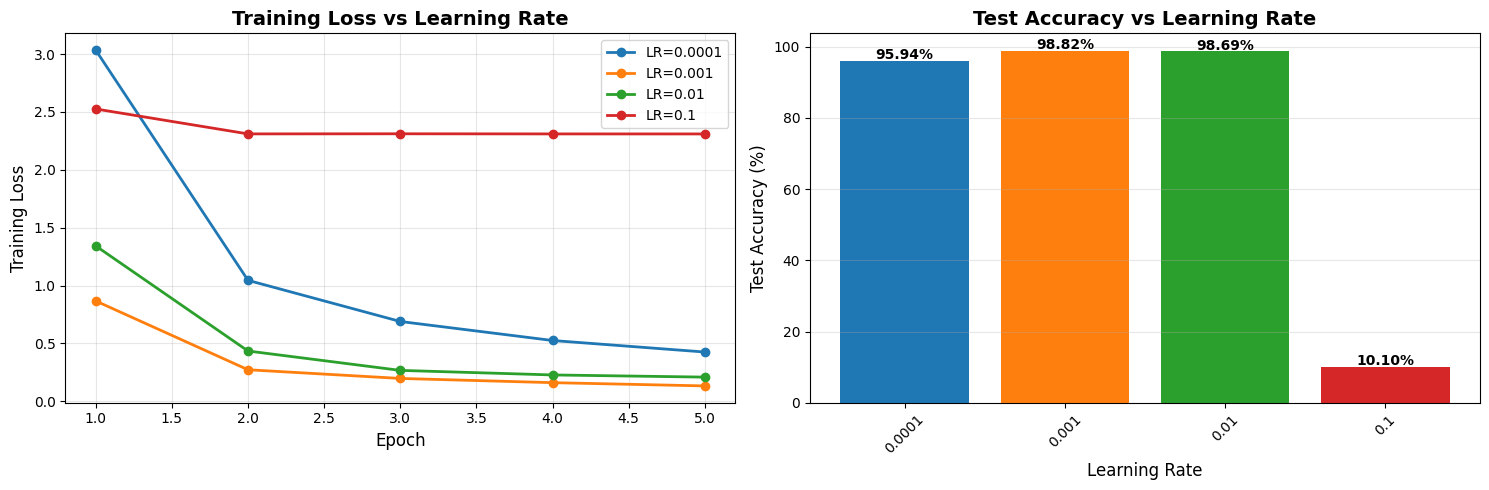


📊 LEARNING RATE COMPARISON SUMMARY
LR         Final Loss   Test Accuracy  
------------------------------------------------------------
0.0001     0.4251       95.94          %
0.0010     0.1324       98.82          %
0.0100     0.2084       98.69          %
0.1000     2.3100       10.10          %

✅ Best Learning Rate: 0.0010
   Achieves 98.82% test accuracy

💡 Key Observations:
   • Moderate LR (0.001-0.01) often works best for Adam


In [38]:
# ============================================================================
# Exercise 3: Learning Rate Sweep (Improved)
# ============================================================================

from typing import List, Dict
import matplotlib.pyplot as plt


def train_with_lr(
    learning_rate: float,
    epochs: int = 5,
    device: torch.device = torch.device('cuda')
) -> Dict[str, any]:
    """
    Train model with specific learning rate and track metrics.
    
    Args:
        learning_rate: Learning rate for optimizer
        epochs: Number of training epochs
        device: Device to train on
    
    Returns:
        Dictionary containing training history
    """
    print(f"\n{'─'*60}")
    print(f"Training with Learning Rate: {learning_rate}")
    print(f"{'─'*60}")
    
    model = SimpleLeNet(num_classes=10, dropout_rate=0.5).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    train_accs = []
    
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            
            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        train_acc = 100.0 * correct / total
        
        train_losses.append(avg_loss)
        train_accs.append(train_acc)
        
        print(f"   Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Train Acc: {train_acc:.2f}%")
    
    # Evaluate on test set
    model.eval()
    correct, total = 0, 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc = 100.0 * correct / total
    print(f"   ✓ Final Test Accuracy: {test_acc:.2f}%")
    
    return {
        'lr': learning_rate,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'final_loss': train_losses[-1],
        'test_accuracy': test_acc
    }


print("="*60)
print("EXERCISE 3: Learning Rate Sweep")
print("="*60)

device = torch.device('cuda')
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 5

lr_results = {}

for lr in learning_rates:
    result = train_with_lr(lr, epochs=epochs, device=device)
    lr_results[lr] = result

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training loss curves
for lr, result in lr_results.items():
    ax1.plot(range(1, len(result['train_losses'])+1), result['train_losses'], 
             marker='o', label=f'LR={lr}', linewidth=2)

ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', fontsize=12)
ax1.set_title('Training Loss vs Learning Rate', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot test accuracy comparison
lrs = list(lr_results.keys())
test_accs = [lr_results[lr]['test_accuracy'] for lr in lrs]

ax2.bar(range(len(lrs)), test_accs, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_xlabel('Learning Rate', fontsize=12)
ax2.set_ylabel('Test Accuracy (%)', fontsize=12)
ax2.set_title('Test Accuracy vs Learning Rate', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(lrs)))
ax2.set_xticklabels([f'{lr}' for lr in lrs], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, acc in enumerate(test_accs):
    ax2.text(i, acc + 0.5, f'{acc:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary table
print(f"\n{'='*60}")
print("📊 LEARNING RATE COMPARISON SUMMARY")
print(f"{'='*60}")
print(f"{'LR':<10} {'Final Loss':<12} {'Test Accuracy':<15}")
print(f"{'-'*60}")
for lr, result in lr_results.items():
    print(f"{lr:<10.4f} {result['final_loss']:<12.4f} {result['test_accuracy']:<15.2f}%")

# Find best learning rate
best_lr = max(lr_results.items(), key=lambda x: x[1]['test_accuracy'])
print(f"\n✅ Best Learning Rate: {best_lr[0]:.4f}")
print(f"   Achieves {best_lr[1]['test_accuracy']:.2f}% test accuracy")

print(f"\n💡 Key Observations:")
if best_lr[0] == 0.0001:
    print("   • Very small LR may train slowly but more stably")
elif best_lr[0] == 0.1:
    print("   • Large LR may cause unstable training or divergence")
else:
    print("   • Moderate LR (0.001-0.01) often works best for Adam")
    
print(f"{'='*60}")


In [39]:
# Exercise 4: Batch Size Experiment (GPU)
print("="*60)
print("Exercise 4: Batch Size Experiment on GPU")
print("="*60)

device = torch.device('cuda')
epochs = 5

batch_sizes = [32, 64, 256]
batch_results = {}

for batch_size in batch_sizes:
    print(f"\nTraining with Batch Size: {batch_size}")
    
    # Create data loaders with different batch sizes
    train_loader_bs = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader_bs = DataLoader(test_data, batch_size=1000, shuffle=False)
    
    model = SimpleLeNet().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    
    epoch_times = []
    
    model.train()
    for epoch in range(epochs):
        epoch_start = time.time()
        running_loss = 0.0
        
        for images, labels in train_loader_bs:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_time = time.time() - epoch_start
        epoch_times.append(epoch_time)
        avg_loss = running_loss / len(train_loader_bs)
        print(f"  Epoch {epoch+1}/{epochs} - Time: {epoch_time:.2f}s - Loss: {avg_loss:.4f}")
    
    avg_epoch_time = sum(epoch_times) / len(epoch_times)
    
    # Test accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader_bs:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    batch_results[batch_size] = {'avg_time': avg_epoch_time, 'accuracy': accuracy}
    print(f"  Avg Time/Epoch: {avg_epoch_time:.2f}s, Test Accuracy: {accuracy:.2f}%")

print("\n" + "="*60)
print("BATCH SIZE COMPARISON:")
print("="*60)
for bs, result in batch_results.items():
    print(f"Batch={bs:3d} - Avg Time/Epoch: {result['avg_time']:.2f}s, Accuracy: {result['accuracy']:.2f}%")
print("\nNote: Larger batches train faster but may have slightly different convergence")
print("="*60)

Exercise 4: Batch Size Experiment on GPU

Training with Batch Size: 32
  Epoch 1/5 - Time: 14.44s - Loss: 0.6209
  Epoch 1/5 - Time: 14.44s - Loss: 0.6209
  Epoch 2/5 - Time: 14.61s - Loss: 0.2454
  Epoch 2/5 - Time: 14.61s - Loss: 0.2454
  Epoch 3/5 - Time: 13.09s - Loss: 0.1790
  Epoch 3/5 - Time: 13.09s - Loss: 0.1790
  Epoch 4/5 - Time: 12.53s - Loss: 0.1465
  Epoch 4/5 - Time: 12.53s - Loss: 0.1465
  Epoch 5/5 - Time: 12.42s - Loss: 0.1320
  Epoch 5/5 - Time: 12.42s - Loss: 0.1320
  Avg Time/Epoch: 13.42s, Test Accuracy: 98.87%

Training with Batch Size: 64
  Avg Time/Epoch: 13.42s, Test Accuracy: 98.87%

Training with Batch Size: 64
  Epoch 1/5 - Time: 9.50s - Loss: 0.7871
  Epoch 1/5 - Time: 9.50s - Loss: 0.7871
  Epoch 2/5 - Time: 8.90s - Loss: 0.2878
  Epoch 2/5 - Time: 8.90s - Loss: 0.2878
  Epoch 3/5 - Time: 9.18s - Loss: 0.2076
  Epoch 3/5 - Time: 9.18s - Loss: 0.2076
  Epoch 4/5 - Time: 9.21s - Loss: 0.1716
  Epoch 4/5 - Time: 9.21s - Loss: 0.1716
  Epoch 5/5 - Time: 8.83s

In [40]:
# Exercise 5: Train LeNet on FashionMNIST
print("="*60)
print("Exercise 5: LeNet on FashionMNIST")
print("="*60)

# Load FashionMNIST dataset
from torchvision import datasets

fashion_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

fashion_train_loader = DataLoader(fashion_train, batch_size=64, shuffle=True)
fashion_test_loader = DataLoader(fashion_test, batch_size=1000, shuffle=False)

print(f"Training samples: {len(fashion_train)}")
print(f"Test samples: {len(fashion_test)}")

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(f"Classes: {class_names}\n")

# Train model
device = torch.device('cuda')
model = SimpleLeNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

print("Training LeNet on FashionMNIST...\n")

model.train()
for epoch in range(epochs):
    running_loss = 0.0
    
    for i, (images, labels) in enumerate(fashion_train_loader, 1):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(fashion_train_loader)
    
    # Test accuracy per epoch
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in fashion_test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc = 100 * correct / total
    model.train()
    
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Test Acc: {test_acc:.2f}%")

# Final evaluation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in fashion_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_accuracy = 100 * correct / total

print("\n" + "="*60)
print(f"Final Test Accuracy on FashionMNIST: {final_accuracy:.2f}%")
print("="*60)
print("\nNote: FashionMNIST is typically harder than MNIST (clothing vs digits)")
print("      Typical accuracy: 85-90% (compared to 98-99% on MNIST)")

Exercise 5: LeNet on FashionMNIST
Training samples: 60000
Test samples: 10000
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Training LeNet on FashionMNIST...

Epoch 1/10 - Loss: 1.2737, Test Acc: 79.12%
Epoch 1/10 - Loss: 1.2737, Test Acc: 79.12%
Epoch 2/10 - Loss: 0.6969, Test Acc: 82.64%
Epoch 2/10 - Loss: 0.6969, Test Acc: 82.64%
Epoch 3/10 - Loss: 0.5869, Test Acc: 84.29%
Epoch 3/10 - Loss: 0.5869, Test Acc: 84.29%
Epoch 4/10 - Loss: 0.5248, Test Acc: 85.73%
Epoch 4/10 - Loss: 0.5248, Test Acc: 85.73%
Epoch 5/10 - Loss: 0.4864, Test Acc: 86.50%
Epoch 5/10 - Loss: 0.4864, Test Acc: 86.50%
Epoch 6/10 - Loss: 0.4535, Test Acc: 86.99%
Epoch 6/10 - Loss: 0.4535, Test Acc: 86.99%
Epoch 7/10 - Loss: 0.4267, Test Acc: 88.12%
Epoch 7/10 - Loss: 0.4267, Test Acc: 88.12%
Epoch 8/10 - Loss: 0.4093, Test Acc: 87.85%
Epoch 8/10 - Loss: 0.4093, Test Acc: 87.85%
Epoch 9/10 - Loss: 0.3911, Test Acc: 88.73%
Epoch 9/10 - Loss: 0.3